In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

output = "../data/filtered_dataset.csv"

#Lectura de la bd
bd = pd.read_csv(output)
bd.head()


Downloading...
From: https://drive.google.com/uc?id=14gZIed1TQsGmiEhW2vc4mIu-F-bSZr6q
To: /content/filtered_dataset.csv
100%|██████████| 688k/688k [00:00<00:00, 88.0MB/s]


,title,authors,year,description,url,citations,cluster,type,clean_title,word_count,char_count,category,domain,publisher,path,query_params,doi,extension
0,bookb health measurement scales practical guid...,"DL Streiner, GR Norman, J Cairney",2024.0,… The intent of this book is to introduce rese...,https://books.google.com/books?hl=en&lr=&id=pb...,21116,1,BOOK,Health measurement scales: a practical guide t...,11,63,health,books.google.com,Google Books,/books,"{'hl': ['en'], 'id': ['pb30EAAAQBAJ'], 'oi': [...",NaN,NaN
1,bookb occupational perspective health,"A Wilcock, C Hocking",2024.0,… health are both biological in origin and rel...,https://books.google.com/books?hl=en&lr=&id=uZ...,3129,1,BOOK,An occupational perspective of health,5,33,health,books.google.com,Google Books,/books,"{'hl': ['en'], 'id': ['uZ4LEQAAQBAJ'], 'oi': [...",NaN,NaN
2,bookb economics health health care,"S Folland, AC Goodman, M Stano, S Danagoulian",2024.0,… new chapters: Disparities in Health and Heal...,https://www.taylorfrancis.com/books/mono/10.43...,2531,1,BOOK,The economics of health and health care,7,33,health,taylorfrancis.com,Taylor & Francis,/books/mono/10.4324/9781003308409/economics-he...,{},10.4324/9781003308409/,NaN
3,bookb epidemiology peoples health theory context,N Krieger,2024.0,"… of Health, 2012), social inequalities in hea...",https://books.google.com/books?hl=en&lr=&id=qe...,1406,1,BOOK,Epidemiology and the people's health: theory a...,8,49,health,books.google.com,Google Books,/books,"{'hl': ['en'], 'id': ['qe78EAAAQBAJ'], 'oi': [...",NaN,NaN
4,bookb health inequality introduction concepts ...,"M Bartley, M Kelly",2024.0,… Gender inequalities in health Macrolevel fac...,https://books.google.com/books?hl=en&lr=&id=Yf...,1216,1,BOOK,Health inequality: an introduction to concepts...,9,60,health,books.google.com,Google Books,/books,"{'hl': ['en'], 'id': ['YfsvEQAAQBAJ'], 'oi': [...",NaN,NaN


In [ ]:
# Analizar los tipos de datos
print(bd.shape)
print(bd.describe())
print(bd.info())

(1200, 18)
              year     citations      cluster   word_count   char_count
count  1199.000000   1200.000000  1200.000000  1200.000000  1200.000000
mean   2019.977481    819.376667     3.363333     9.473333    59.160000
std       1.667822   1758.435970     2.770870     4.649262    29.355877
min    2018.000000      8.000000     0.000000     1.000000     7.000000
25%    2019.000000    148.750000     1.000000     6.000000    38.000000
50%    2020.000000    437.500000     3.000000     9.000000    53.000000
75%    2021.000000    820.750000     6.000000    12.000000    74.000000
max    2024.000000  24952.000000     9.000000    26.000000   149.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1200 non-null   object 
 1   authors       1200 non-null   object 
 2   year          1199 non-null   float64
 3   description   

In [ ]:
# Ver si tiene valores faltantes
print(bd.isnull().sum())
print(bd["clean_title"].isnull().sum())

title             0
authors           0
year              1
description       8
url               0
citations         0
cluster           0
type            793
clean_title       0
word_count        0
char_count        0
category          0
domain            8
publisher         0
path              0
query_params      0
doi             942
extension       974
dtype: int64
0


In [ ]:
# Eliminar valores faltantes de solo ("description", "year")
bd = bd.dropna(subset=["description", "year"])
bd.isnull().sum()

,0
title,0
authors,0
year,0
description,0
url,0
citations,0
cluster,0
type,793
clean_title,0
word_count,0


In [ ]:
# eliminar domain, path, query_params, doi, extension
bd = bd.drop(["domain", "path", "query_params", "doi", "extension", "authors", "type", "url", "title"], axis=1)

In [ ]:
#Imprimir la base de datos
bd.head()

,year,description,citations,cluster,clean_title,word_count,char_count,category,publisher
0,2024.0,… The intent of this book is to introduce rese...,21116,1,Health measurement scales: a practical guide t...,11,63,health,Google Books
1,2024.0,… health are both biological in origin and rel...,3129,1,An occupational perspective of health,5,33,health,Google Books
2,2024.0,… new chapters: Disparities in Health and Heal...,2531,1,The economics of health and health care,7,33,health,Taylor & Francis
3,2024.0,"… of Health, 2012), social inequalities in hea...",1406,1,Epidemiology and the people's health: theory a...,8,49,health,Google Books
4,2024.0,… Gender inequalities in health Macrolevel fac...,1216,1,Health inequality: an introduction to concepts...,9,60,health,Google Books


In [ ]:
#imprimir las categorias
print(bd["category"].unique())

['health' 'biology' 'nutrition' 'finance' 'economic growth' 'economy']


In [ ]:
# Contar la cantidad de artículos por categoría
conteo_categorias = bd["category"].value_counts()

# Mostrar los valores
print(conteo_categorias)

category
health             200
nutrition          200
biology            199
economic growth    199
economy            197
finance            196
Name: count, dtype: int64


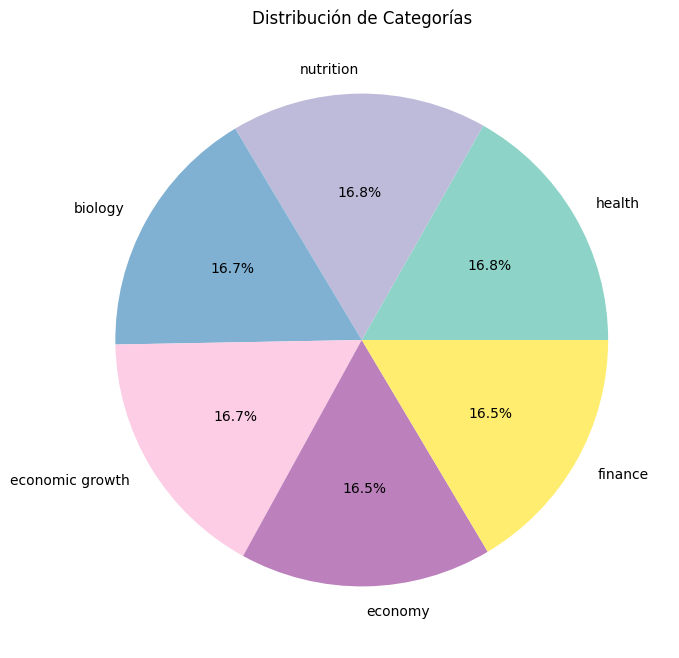

In [ ]:
plt.figure(figsize=(8, 8))
conteo_categorias.plot.pie(autopct="%1.1f%%", colormap="Set3")
plt.title("Distribución de Categorías")
plt.ylabel("")  # Ocultar etiqueta del eje Y
plt.show()

In [ ]:
import re

def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r"\d+", "", texto)  # Eliminar números
    texto = re.sub(r"[^\w\s]", "", texto)  # Eliminar signos de puntuación
    return texto.strip()  # Eliminar espacios extras

# Aplicar limpieza
bd["descripcion"] = bd["description"].astype(str).apply(limpiar_texto)

#Eliminar description
bd = bd.drop(["description"], axis=1)

In [ ]:
bd.head()

,year,citations,cluster,clean_title,word_count,char_count,category,publisher,descripcion
0,2024.0,21116,1,Health measurement scales: a practical guide t...,11,63,health,Google Books,the intent of this book is to introduce resear...
1,2024.0,3129,1,An occupational perspective of health,5,33,health,Google Books,health are both biological in origin and relat...
2,2024.0,2531,1,The economics of health and health care,7,33,health,Taylor & Francis,new chapters disparities in health and health ...
3,2024.0,1406,1,Epidemiology and the people's health: theory a...,8,49,health,Google Books,of health social inequalities in health are d...
4,2024.0,1216,1,Health inequality: an introduction to concepts...,9,60,health,Google Books,gender inequalities in health macrolevel facto...


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

# Inspeccionar columnas
print(bd.info())

# Variables
X_text = bd["descripcion"]  # Texto principal
X_categoricas = bd[["publisher"]]  # Variables categóricas
X_numericas = bd[["citations", "year", "char_count"]]  # Variables numéricas (ajústalo según tu dataset)
y = bd["category"]  # Etiqueta

# **🔹 Procesar Texto (TF-IDF)**
vectorizer = TfidfVectorizer(max_features=5000)
X_text_tfidf = vectorizer.fit_transform(X_text)

# **🔹 Procesar Variables Categóricas**
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_categoricas_ohe = ohe.fit_transform(X_categoricas)

# **🔹 Procesar Variables Numéricas**
scaler = MinMaxScaler()
X_numericas_scaled = scaler.fit_transform(X_numericas)

# **🔹 Combinar todo**
from scipy.sparse import hstack

X_final = hstack((X_text_tfidf, X_categoricas_ohe, X_numericas_scaled))

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


<class 'pandas.core.frame.DataFrame'>
Index: 1191 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         1191 non-null   float64
 1   citations    1191 non-null   int64  
 2   cluster      1191 non-null   int64  
 3   clean_title  1191 non-null   object 
 4   word_count   1191 non-null   int64  
 5   char_count   1191 non-null   int64  
 6   category     1191 non-null   object 
 7   publisher    1191 non-null   object 
 8   descripcion  1191 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 93.0+ KB
None


In [ ]:
print("Nombres de las nuevas columnas categóricas:")
print(ohe.get_feature_names_out())

Nombres de las nuevas columnas categóricas:
['publisher_ACM Digital Library' 'publisher_AIS Electronic Library'
 'publisher_APA PsycNet' 'publisher_Academia.edu'
 'publisher_Agricultural Information and Documentation Service of the Americas'
 'publisher_Alamance Community College'
 'publisher_American Academy of Pediatrics'
 'publisher_American Academy of Pediatrics via Wiley'
 'publisher_American Chemical Society Publications'
 'publisher_American College of Physicians Journals'
 'publisher_American Economic Association'
 'publisher_American Fisheries Society via Wiley'
 'publisher_American Heart Association Journals'
 'publisher_American Physiological Society'
 'publisher_American Society for Microbiology'
 'publisher_American Society of Clinical Oncology'
 'publisher_American Society of Hematology' 'publisher_Annual Reviews'
 'publisher_Applied Economics Research Centre'
 'publisher_Aspen Publishers via Wiley' 'publisher_Atlantis Press'
 'publisher_Autres chiffres du chômage' 'publi

In [ ]:
print("Palabras más importantes en TF-IDF:")
print(vectorizer.get_feature_names_out()[:20])  # Ver las primeras 20 palabras

Palabras más importantes en TF-IDF:
['abbott' 'abdelal' 'aberration' 'ability' 'able' 'abnormal'
 'abnormalities' 'abnormality' 'about' 'above' 'abrupt' 'absence'
 'absolute' 'absorb' 'absorbed' 'absorption' 'abstract' 'abstracts'
 'abundance' 'abundant']


In [ ]:
import pandas as pd
from scipy.sparse import hstack

# Obtener nombres de columnas
columnas_texto = vectorizer.get_feature_names_out()
columnas_categoricas = ohe.get_feature_names_out()
columnas_numericas = X_numericas.columns

# Convertir a DataFrame
df_X_train = pd.DataFrame(X_train.toarray(), columns=list(columnas_texto) + list(columnas_categoricas) + list(columnas_numericas))

# Agregar la columna de categoría para referencia
df_X_train["categoria"] = y_train.values

# Mostrar las primeras filas
print("🔹 Datos de Entrenamiento con nombres claros:")
display(df_X_train.head())


🔹 Datos de Entrenamiento con nombres claros:


,abbott,abdelal,aberration,ability,able,abnormal,abnormalities,abnormality,about,above,...,publisher_Wiley Interdisciplinary Reviews,publisher_Wiley Online Library,publisher_World Health Organization IRIS,publisher_Zien Journals Publishing,publisher_arXiv,publisher_طرح آمایش سرزمین صنعتی، معدنی و تجاری,citations,year,char_count,categoria
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.007777,0.666667,0.408451,biology
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002886,0.500000,0.352113,finance
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003929,0.666667,0.077465,finance
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.024094,0.500000,0.302817,nutrition
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.006775,0.000000,0.401408,finance


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Entrenar modelo
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predicciones
y_pred_nb = nb.predict(X_test)

# Matriz de confusión
cm_nb = confusion_matrix(y_test, y_pred_nb)


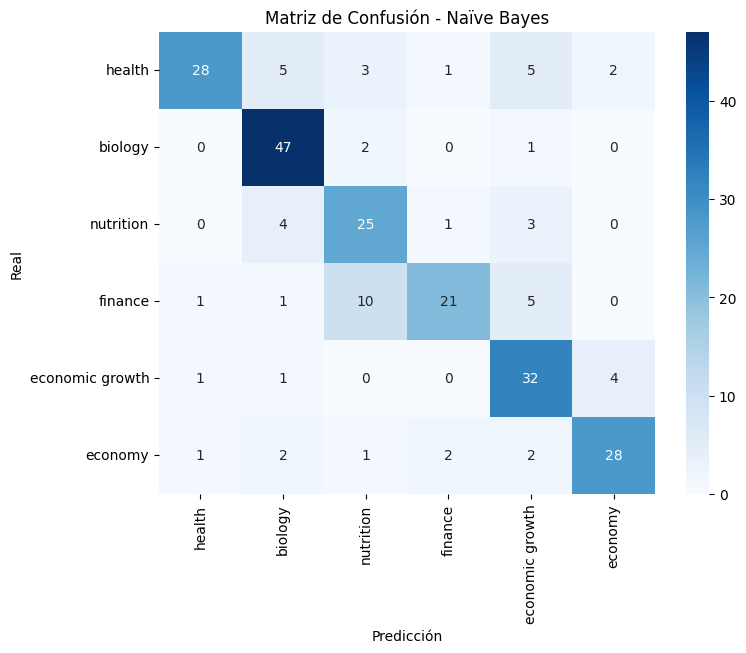

In [ ]:
def plot_confusion_matrix(cm, labels, title):
    # Create a heatmap using plotly
    fig = go.Figure(data=go.Heatmap(
                   z=cm,
                   x=labels,
                   y=labels,
                   colorscale='Blues',
                   text=cm,
                   texttemplate="%{text}",
                   textfont={"size":14},
                   hoverongaps=False))
    
    fig.update_layout(
        title=title,
        xaxis_title="Predicción",
        yaxis_title="Real", 
        xaxis_tickangle=-45,
        width=700, 
        height=600
    )
    
    # Invert the y-axis to match the typical confusion matrix layout
    fig.update_yaxes(autorange="reversed")
    
    fig.show()

# Llamar la función con el modelo de Naïve Bayes
plot_confusion_matrix(cm_nb, labels=y.unique(), title="Matriz de Confusión - Naïve Bayes")


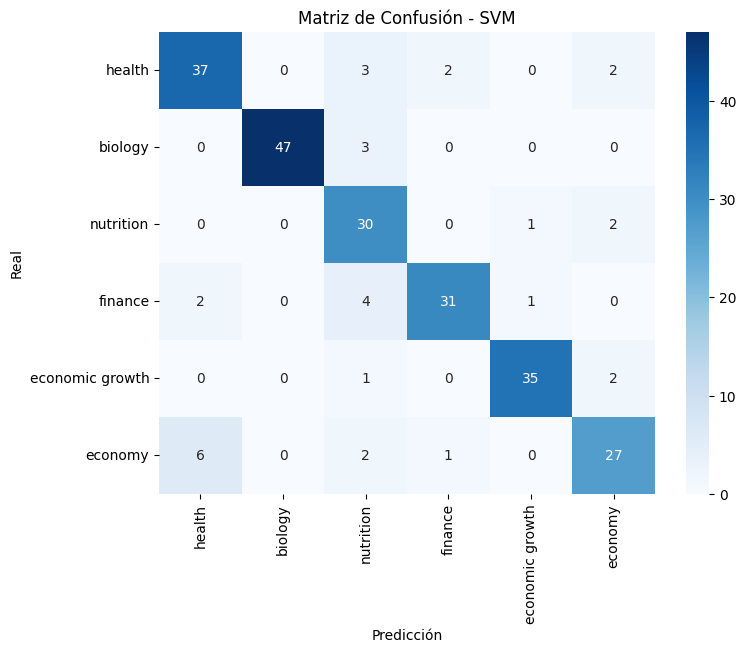

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)

plot_confusion_matrix(cm_svm, labels=y.unique(), title="Matriz de Confusión - SVM")


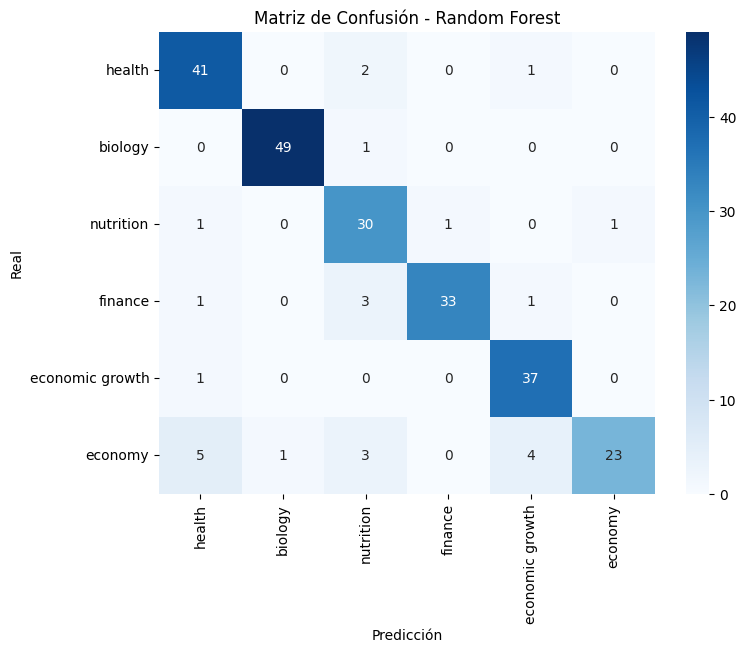

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plot_confusion_matrix(cm_rf, labels=y.unique(), title="Matriz de Confusión - Random Forest")
